In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('../data/dados-cafe-testes.csv')
df['data'] = pd.to_datetime(df['data'])
df = df.set_index("data")
df.head()

,preco_anterior_br,preco_2_anterior_br,var_preco_anterior_2_anterior_br,var_preco_anterior_2_anterior_eua,dolar,preco_br
data,,,,,,
2012-06-01,476.49,481.49,-5.00,0.68,1.8579,481.91
2012-09-01,481.91,476.49,5.42,5.80,1.8329,488.41
2012-10-01,488.41,481.91,6.50,6.87,1.7995,491.50
2012-11-01,491.50,488.41,3.09,7.60,1.8030,504.65
2012-12-01,504.65,491.50,13.15,0.88,1.7780,501.74


In [3]:
# scaler_x = MinMaxScaler()
# df[['dolar', 'var_preco_anterior_2_anterior_br', 'preco_robusta_br']] = scaler_x.fit_transform(df[['dolar', 'var_preco_anterior_2_anterior_br', 'preco_robusta_br']])

In [4]:
# scaler_y = MinMaxScaler()
# df[['preco_br']] = scaler_y.fit_transform(df[['preco_br']])

In [5]:
year_list = df.index.year.unique().tolist()
splits = {'train': [], 'test': []}

for idx, yr in enumerate(year_list[:-1]):
    train_yr = year_list[:idx+1]
    test_yr = [year_list[idx+1]]
    print('TRAIN: ', train_yr, 'TEST: ',test_yr)
    
    splits['train'].append(df.loc[df.index.year.isin(train_yr), :])
    splits['test'].append(df.loc[df.index.year.isin(test_yr), :])
    
    X_train = splits['train'][idx].drop(['preco_br'], axis = 1).values # X
    y_train = splits['train'][idx]['preco_br'].values # Y
    
    X_test =  splits['test'][idx].drop(['preco_br'], axis = 1).values
    y_test = splits['test'][idx]['preco_br'].values
    
    reg = LinearRegression().fit(X_train, y_train)
    
    predi = reg.predict(X_test)
    
    print(r2_score(y_test, predi))

TRAIN:  [2012] TEST:  [2013]
0.9808018066373827
TRAIN:  [2012, 2013] TEST:  [2014]
0.9915091287338541
TRAIN:  [2012, 2013, 2014] TEST:  [2015]
0.9667625642274486
TRAIN:  [2012, 2013, 2014, 2015] TEST:  [2016]
0.9752895772925418
TRAIN:  [2012, 2013, 2014, 2015, 2016] TEST:  [2017]
0.9846261146855474
TRAIN:  [2012, 2013, 2014, 2015, 2016, 2017] TEST:  [2018]
0.9494863641239973
TRAIN:  [2012, 2013, 2014, 2015, 2016, 2017, 2018] TEST:  [2019]
0.9942024861107802
TRAIN:  [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] TEST:  [2020]
0.9826742387938187


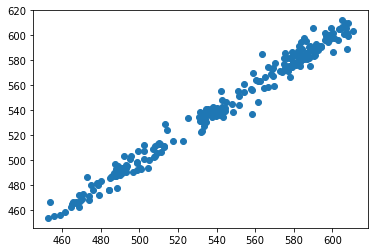

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predi)